# **Taller de Operaciones Morfologicas**

## **Estudiante:** *Edward Fabian Goyeneche Velandia*
## **Docente:** *Diego Armando Perez Rosero*
## **Asignatura:** *Procesamiento Digital de Señales*

## **Ejercicio 1**

Crea un algoritmo que identifique y separe cada uno de los objetos presentes en la siguiente imagen, objeto en color blanco y fondoade color negro:

In [2]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import numpy as np


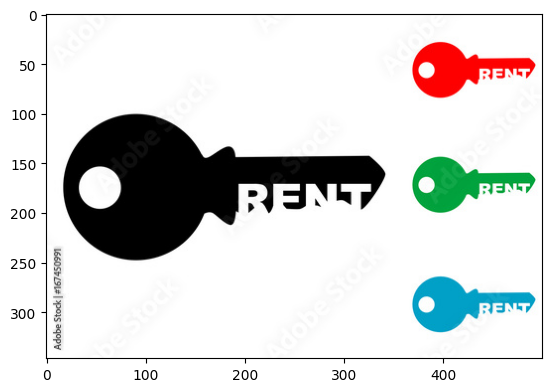

In [ ]:
im = mpimg.imread('color_llaves.jpg')
plt.imshow(im)

*El  codigo presente para el desarrollo del ejercicio uno, en gusto personal se hizo uso de  la libreria cv2 , se hizo de la siguiente manera*

* *Se convierte  la imagen, la cual es de color RGB a una imagen en escala de grises,este pasa es el iniciail para simplicar el progesamiento de la imagen*

* *Se aplica un umbral a la imagen obtenida  del procedimiento de la escala de grises para converrir  a una iamgen  binaria, la estructura de los pixeles se maneja de que  > 127 se convierte en "0" color negro y los pixeles $\leq$ 127 , se convierte en 255  color blanco*


* *Se  Encuentra los contornos  de los objetos de la iamgen ya binaria convertida  y trata de buscar los contornos externos*

* *Se  hace una copia de la imagen original  para pdoer usarla de fondo para poder colocar los dibujos de los contornos*

* *Se dibuja los contorno obtenidos en la imagen de copia, el contorno se deja en color verde, para que resalte en los fondos.*




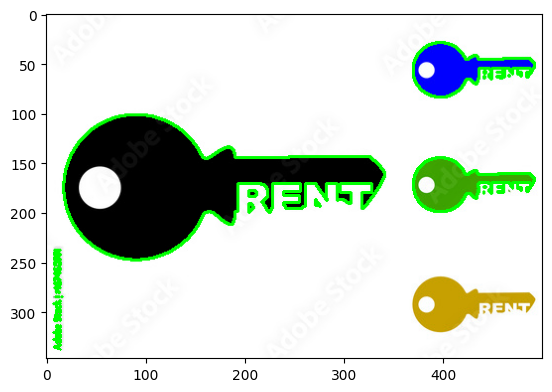

In [ ]:
# Convertir la imagen a escala de grises
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

# Aplicar un umbral para binarizar la imagen
_, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

# Contornos de los objetos
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Copia de la imagen para dibujar los contornos
im_copy = im.copy()

# Dibujar los contornos encontrados
cv2.drawContours(im_copy, contours, -1, (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(im_copy, cv2.COLOR_BGR2RGB))
plt.show()

## **Ejercicio 2:**
Diseña una clase que acepte una imagen en formato RGB y aplique manualmente las siguientes transformaciones:

* Conversión de RGB a HSV.

* Conversión de RGB a CMYK


Se crea la clase **ImageTransformer**  que reciba la iamgen y aplique las  transformaciones  y tiene los siguientes metodos

* ***Método rgb_to_hsv:***

    *Convierte la imagen de RGB a HSV usando cv2.cvtColor.*
* ***Método rgb_to_cmyk:***

    * *Normaliza los valores RGB dividiendo por 255.*
    * *Calcula los valores CMY.*
    * *Calcula el valor K como el mínimo de los valores CMY.*
    *    *Ajusta los valores CMY para evitar la división por cero.*
     *   *Calcula los valores CMYK y los combina en una sola imagen.*

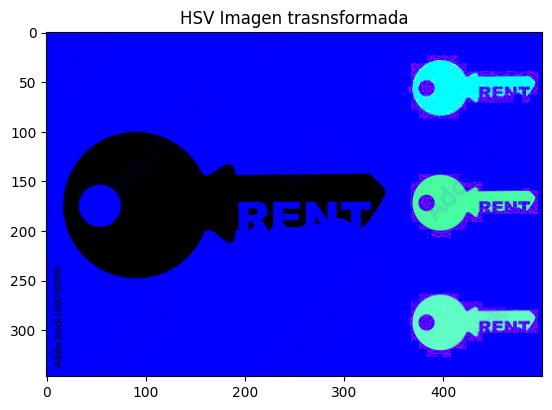

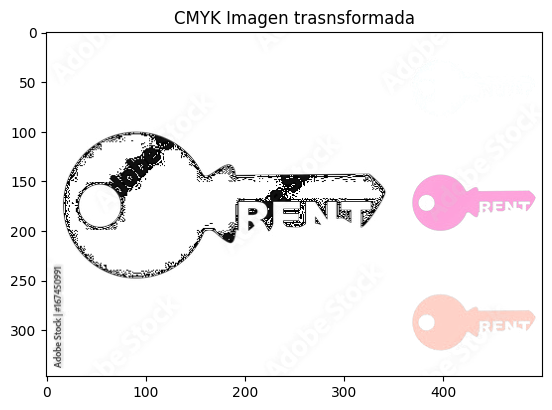

In [ ]:
# se usa la misma imagen del putno anterior
class ImageTransformer:
    
    """
        Clase para transformar imágenes entre espacios de color RGB, HSV y CMYK.
        
        Attributes
        ----------
        image : numpy.ndarray
            Se carga la imagen en formato RGB.
        Methods
        -------
        rgb_to_hsv():
            Este metodo convierte la imagen RGB a HSV y devuelve la imagen en HSV.
        rgb_to_cmyk():
            Este metodo convierte la imagen RGB a CMYK y devuelve la imagen en CMYK.
        """
    def __init__(self, image_path):
        self.image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

    def rgb_to_hsv(self):
        hsv_image = cv2.cvtColor(self.image, cv2.COLOR_RGB2HSV)
        return hsv_image

    def rgb_to_cmyk(self):
        rgb_image = self.image / 255.0
        c = 1 - rgb_image[..., 0]
        m = 1 - rgb_image[..., 1]
        y = 1 - rgb_image[..., 2]
        k = np.minimum(c, np.minimum(m, y))
        k[k == 1] = 0.999
        c = (c - k) / (1 - k)
        m = (m - k) / (1 - k)
        y = (y - k) / (1 - k)
        cmyk_image = (np.dstack((c, m, y, k)) * 255).astype(np.uint8)
        return cmyk_image


image_path = 'color_llaves.jpg'
transformer = ImageTransformer(image_path)

# Convertir a HSV
hsv_image = transformer.rgb_to_hsv()
plt.imshow(hsv_image)
plt.title('HSV Imagen trasnsformada')
plt.show()

# Convertir a CMYK
cmyk_image = transformer.rgb_to_cmyk()
plt.imshow(cmyk_image)
plt.title('CMYK Imagen trasnsformada')
plt.show()

## **Ejercicio 3**
Desarrolla una clase que acepte una imagen y realice las siguientes transformaciones de forma manual:

* Escalado de la imagen.
* Cambio de tamaño de la imagen.

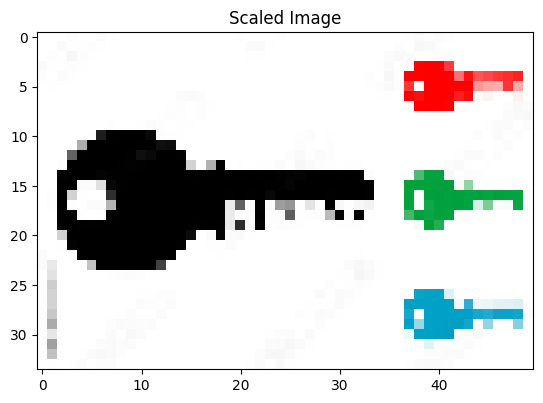

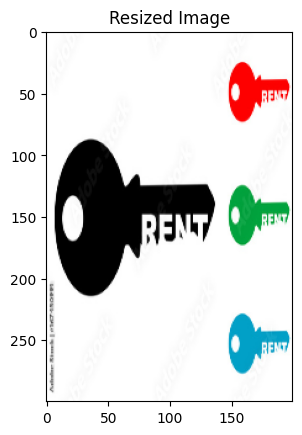

In [9]:


class ImageTransformer:
    """
    Clase para realizar transformaciones de  una imagen.

    Méthods:
    - scale_image(scale_factor): Escala la imagen por un factor dado.
    - resize_image(new_width, new_height): Cambia el tamaño de la imagen a las dimensiones especificadas.
    """
    def __init__(self, image_path):
        self.image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

    def scale_image(self, scale_factor):
        height, width = self.image.shape[:2]
        new_width = int(width * scale_factor)
        new_height = int(height * scale_factor)
        scaled_image = cv2.resize(self.image, (new_width, new_height), interpolation=cv2.INTER_LINEAR)
        return scaled_image

    def resize_image(self, new_width, new_height):

        resized_image = cv2.resize(self.image, (new_width, new_height), interpolation=cv2.INTER_LINEAR)
        return resized_image



# Test de la clase ImageTransformer
image_path = 'color_llaves.jpg'
transformer = ImageTransformer(image_path)

# Escalar la imagen
scale_factor = 0.1
scaled_image = transformer.scale_image(scale_factor)
plt.imshow(scaled_image)
plt.title('Scaled Image')
plt.show()

# Tamaño
new_width = 200
new_height = 300
resized_image = transformer.resize_image(new_width, new_height)
plt.imshow(resized_image)
plt.title('Resized Image')
plt.show()

# **Ejercicio 4**
Reproduce los procesos enseñados en clase utilizando la biblioteca Opencv. Aplica las mismas transformaciones usando las funciones proporcionadas por la librería.)

* ##  **Erosión:**

In [11]:


def plot_image(image, title=''):
    """
    Muestra una imagen con un título dado.

    Parámetros:
    - image (numpy.ndarray): Imagen a mostrar.
    - title (str): Título de la imagen.
    """
    plt.title(title, size=10)
    plt.imshow(image, cmap='gray')
    plt.axis('off')

def main():
    """
    Función principal que realiza las operaciones de lectura, conversión, binarización y erosión de la imagen.
    """
    image_path = 'color_llaves.jpg'
    
    # Lee la imagen
    im = cv2.imread(image_path)
    
    # Convierte la imagen de BGR a escala de grises
    im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    
    # Binariza la imagen utilizando un umbral fijo
    _, im = cv2.threshold(im, 127, 255, cv2.THRESH_BINARY)
    
    plt.figure(figsize=(20, 20))
    
    # Muestra la imagen original
    plt.subplot(1, 3, 1)
    plot_image(im, 'Original')
    
    # Define el elemento estructurante y realiza la erosión
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    im_eroded = cv2.erode(im, kernel, iterations=1)
    
    # Muestra la imagen erosionada con el primer kernel
    plt.subplot(1, 3, 2)
    plot_image(im_eroded, 'Erosion with rectangle size ' + str(kernel.shape))
    
    # Cambia el tamaño del elemento estructurante y realiza la erosión
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 3))
    im_eroded = cv2.erode(im, kernel, iterations=1)
    
    # Muestra la imagen erosionada con el segundo kernel
    plt.subplot(1, 3, 3)
    plot_image(im_eroded, 'Erosion with rectangle size ' + str(kernel.shape))
    
    plt.show()


* ## **Dilatacion** 

In [26]:

def plot_image(image, title=''):
    """
    Muestra una imagen con un título dado.

    Parámetros:
    - image (numpy.ndarray): Imagen a mostrar.
    - title (str): Título de la imagen.
    """
    plt.title(title, size=20)
    plt.imshow(image, cmap='gray')
    plt.axis('off')

def main():
    """
    Función principal que realiza las operaciones de lectura, normalización, inversión del canal alfa,
    binarización y dilatación de la imagen.
    """
    image_path = 'llaves.png'
    
    # Lee la imagen con el canal alfa
    im = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    
    # Normaliza la imagen
    im = im.astype('float32') / im.max()
    
    # Invierte el canal alfa para obtener el fondo
    im = 1.0 - im[:, :, 3]
    
    # Binariza la imagen
    _, im = cv2.threshold(im, 0.5, 1.0, cv2.THRESH_BINARY)
    
    plt.figure(figsize=(18, 9))
    plt.subplot(131)
    plt.imshow(im, cmap='gray')
    plt.title('Original', size=20)  
    plt.axis('off')  
    
    # Muestra la imagen original
    plt.subplot(131)
    plot_image(im, 'Original')
    
    for d in range(1, 3):
        # Aproxima un disco usando el elemento estructurante elíptico
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2*d, 2*d))
        im_dilated = cv2.dilate(im, kernel, iterations=1)
        
        # Muestra la imagen dilatada con el kernel elíptico
        plt.subplot(1, 3, d+1)
        plt.imshow(im_dilated, cmap='gray')
        plot_image(im_dilated, 'Dilatación tamaño del disco ' + str(2*d))
        plt.axis('off')
    
    plt.show()



* ## **OPENING AND CLOSING**

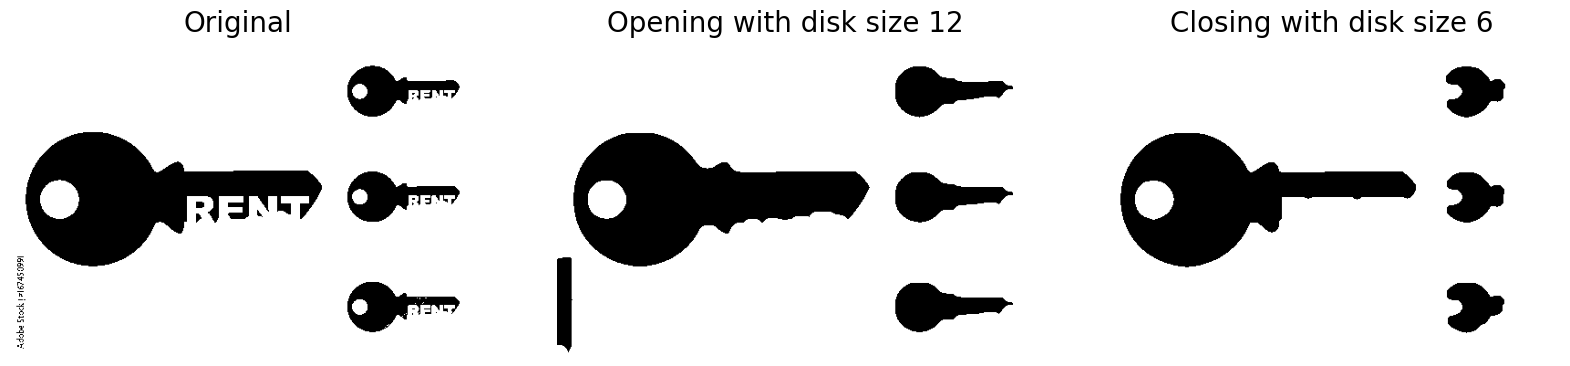

In [28]:

def plot_image(image, title=''):
    """
    Muestra una imagen con un título dado.

    Parámetros:
    - image (numpy.ndarray): Imagen a mostrar.
    - title (str): Título de la imagen.
    """
    plt.title(title, size=20)
    plt.imshow(image, cmap='gray')
    plt.axis('off')

def main():
    """
    Función principal que realiza las operaciones de lectura, conversión a escala de grises,
    binarización, apertura y cierre de la imagen.
    """
    image_path = 'color_llaves.jpg'
    
    # Lee la imagen y la convierte a escala de grises
    im = cv2.imread(image_path, cv2.IMREAD_COLOR)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    
    # Binariza la imagen
    _, im = cv2.threshold(im, 127, 1, cv2.THRESH_BINARY)
    
    plt.figure(figsize=(20, 10))
    
    # Muestra la imagen original
    plt.subplot(1, 3, 1)
    plot_image(im, 'Original')
    
    # Apertura
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (24, 24))
    im_opened = cv2.morphologyEx(im.astype(np.float32), cv2.MORPH_OPEN, kernel)
    plt.subplot(1, 3, 2)
    plot_image(im_opened, 'Opening with disk size 12')
    
    # Cierre
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (12, 12))
    im_closed = cv2.morphologyEx(im.astype(np.float32), cv2.MORPH_CLOSE, kernel)
    plt.subplot(1, 3, 3)
    plot_image(im_closed, 'Closing with disk size 6')
    
    plt.show()

if __name__ == "__main__":
    main()

* ## **SKELETONIZING**

<Figure size 640x480 with 0 Axes>

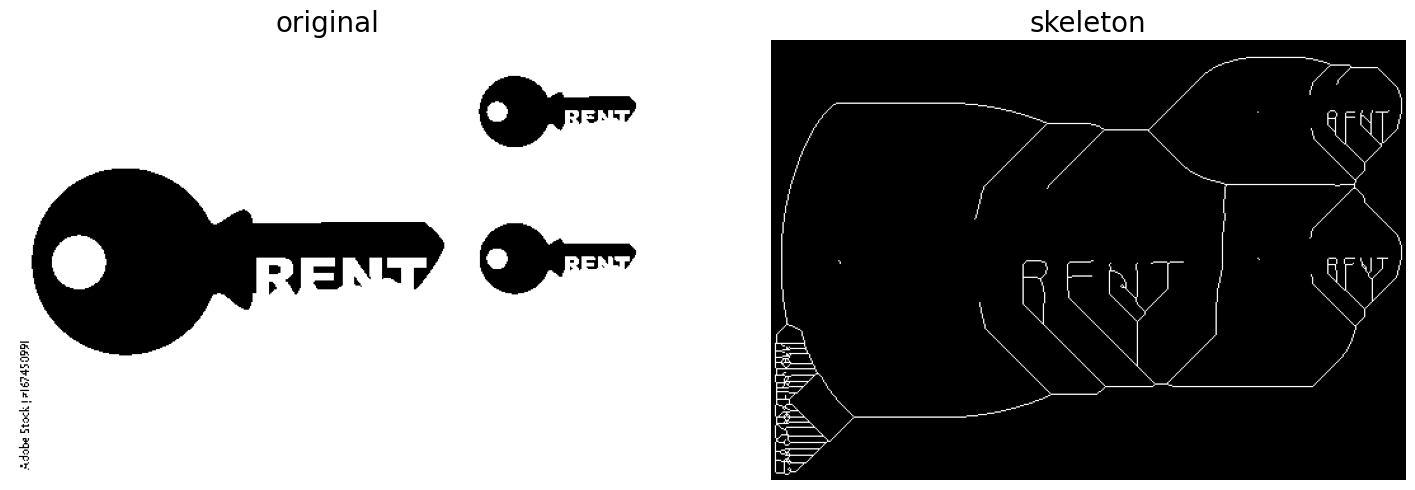

In [37]:
import pylab

def plot_images_horizontally(original, filtered, filter_name, sz=(18,7)):
    pylab.gray()
    pylab.figure(figsize = sz)
    pylab.subplot(1,2,1), plot_image(original, 'original')
    pylab.subplot(1,2,2), plot_image(filtered, filter_name)
    pylab.show()

from skimage.morphology import skeletonize
from skimage.io import imread
from skimage import img_as_float

image_path = 'color_llaves.jpg'
im = img_as_float(imread(image_path)[..., 2])
threshold = 0.5
im[im <= threshold] = 0
im[im > threshold] = 1
skeleton = skeletonize(im)
plot_images_horizontally(im, skeleton, 'skeleton', sz=(18,9))

* ## **COMPUTING THE CONVEX HULL**

<Figure size 640x480 with 0 Axes>

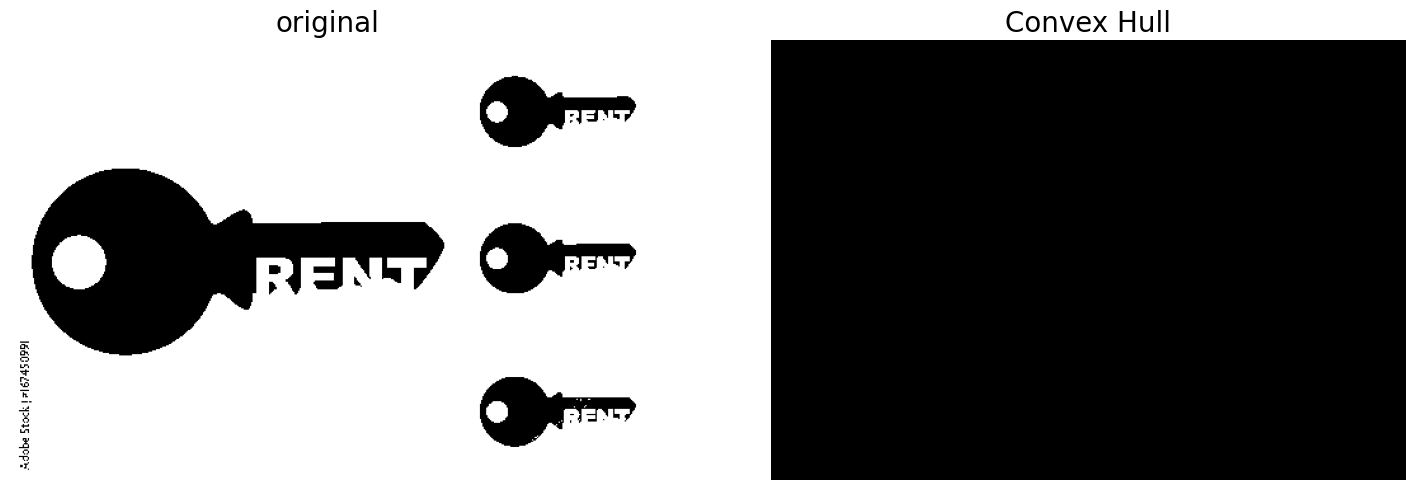

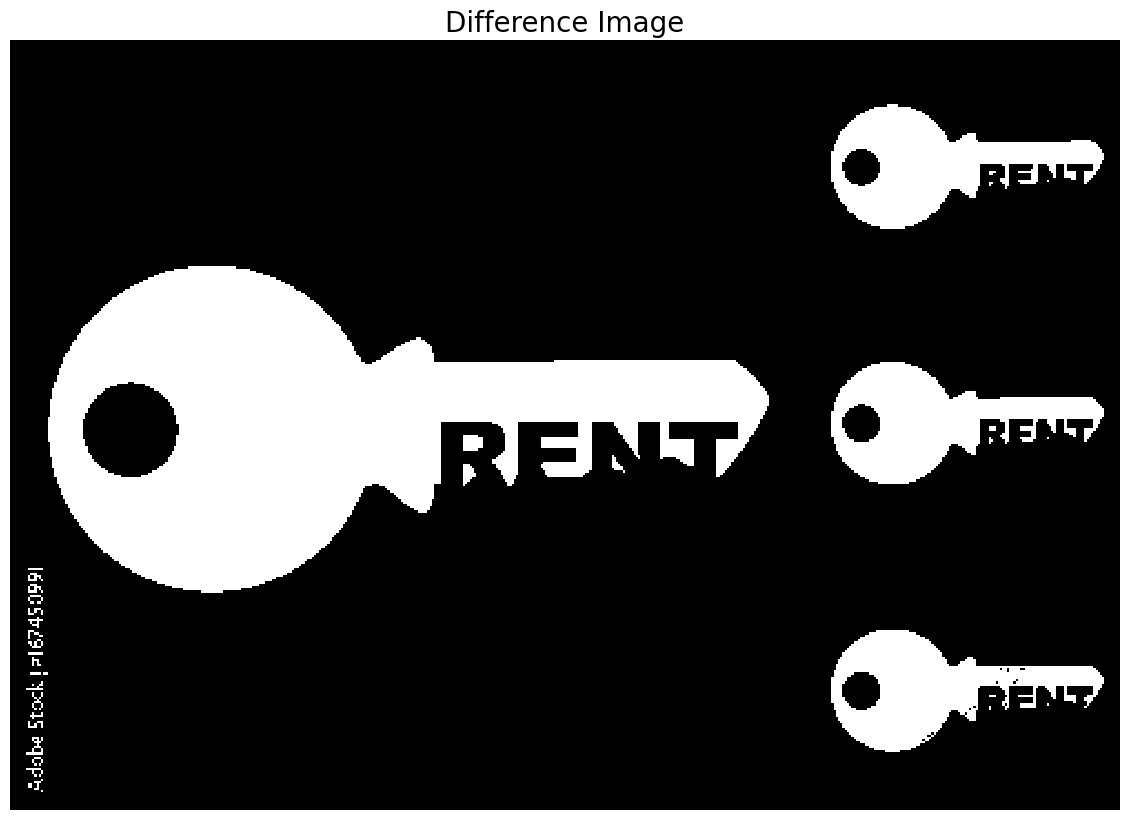

In [40]:
image_path = 'color_llaves.jpg'
im = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
_, im = cv2.threshold(im, 127, 255, cv2.THRESH_BINARY) # Binariza la imagen

# Encuentra los contornos en la imagen binaria
contours, _ = cv2.findContours(im, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Calcula la envolvente convexa para el mayor contorno
# Nota: Esto es solo para demostración; en la práctica, podrías querer manejar múltiples contornos.
cnt = max(contours, key=cv2.contourArea)
hull = cv2.convexHull(cnt)

# Dibuja la envolvente convexa en una imagen negra
hull_image = np.zeros_like(im)
cv2.drawContours(hull_image, [hull], 0, 255, thickness=cv2.FILLED)

# Mostrar imágenes
plot_images_horizontally(im, hull_image, 'Convex Hull', sz=(18, 9))



# Crear una copia de la envoltura convexa para manipular
chull_diff = hull_image.astype(np.float32).copy()

# Diferenciar visualmente los píxeles que están tanto en la imagen original como en la envoltura convexa
chull_diff[im_bool] = 2  # Esto aumenta el brillo donde ambos se superponen

# Visualización
plt.figure(figsize=(20, 10))
plt.imshow(chull_diff, cmap='gray', interpolation='nearest')
plt.title('Difference Image', size=20)
plt.axis('off')  # Ocultar los ejes para una visualización más limpia
plt.show()

* ## **REMOVING SMALL OBJECTS**

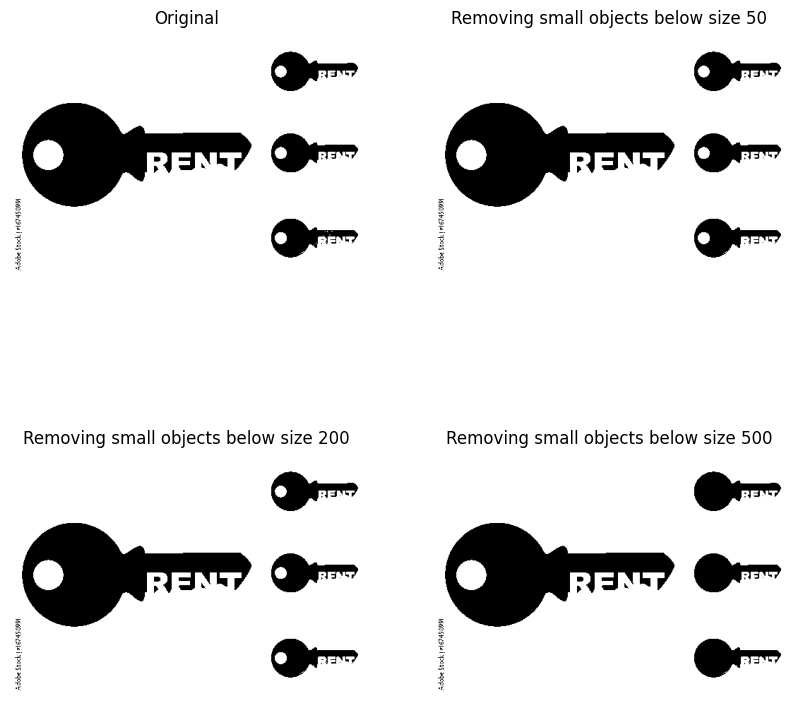

In [41]:
image_path = 'color_llaves.jpg'
im = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
_, im_bin = cv2.threshold(im, 127, 255, cv2.THRESH_BINARY)  # Binariza la imagen

def remove_small_objects_cv(image, min_size, connectivity=8):
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(image, connectivity, cv2.CV_32S)
    new_image = np.zeros_like(image)
    for i in range(1, num_labels):  # Empieza en 1 para ignorar el fondo
        if stats[i, cv2.CC_STAT_AREA] >= min_size:
            new_image[labels == i] = 255
    return new_image

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(im_bin, cmap='gray'), plt.title('Original')
plt.axis('off')

sizes = [50, 200, 500]
for idx, size in enumerate(sizes, start=2):
    im_filtered = remove_small_objects_cv(im_bin, size)
    plt.subplot(2, 2, idx)
    plt.imshow(im_filtered, cmap='gray'), plt.title(f'Removing small objects below size {size}')
    plt.axis('off')

plt.show()

* ## **White and black top-hats**


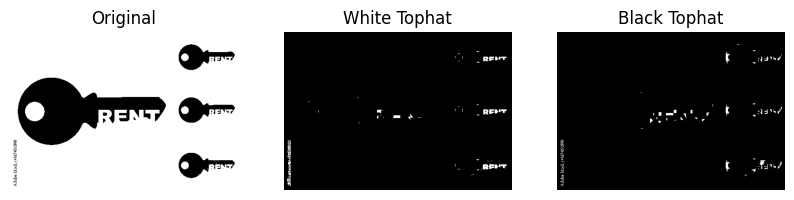

In [ ]:
def plot_image(image, title=''):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')

image_path = 'color_llaves.jpg'
im = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  
_, im = cv2.threshold(im, 127, 255, cv2.THRESH_BINARY)  

# Define el elemento estructurante como un cuadrado
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))

# Aplica operaciones de sombrero blanco y negro
white_tophat = cv2.morphologyEx(im, cv2.MORPH_TOPHAT, kernel)
black_tophat = cv2.morphologyEx(im, cv2.MORPH_BLACKHAT, kernel)

# Visualización
plt.figure(figsize=(10, 15))
plt.subplot(1, 3, 1)
plot_image(im, 'Original')

plt.subplot(1, 3, 2)
plot_image(white_tophat, 'White Tophat')

plt.subplot(1, 3, 3)
plot_image(black_tophat, 'Black Tophat')

plt.show()

* ## **EXTRACTING THE BOUNDARY**

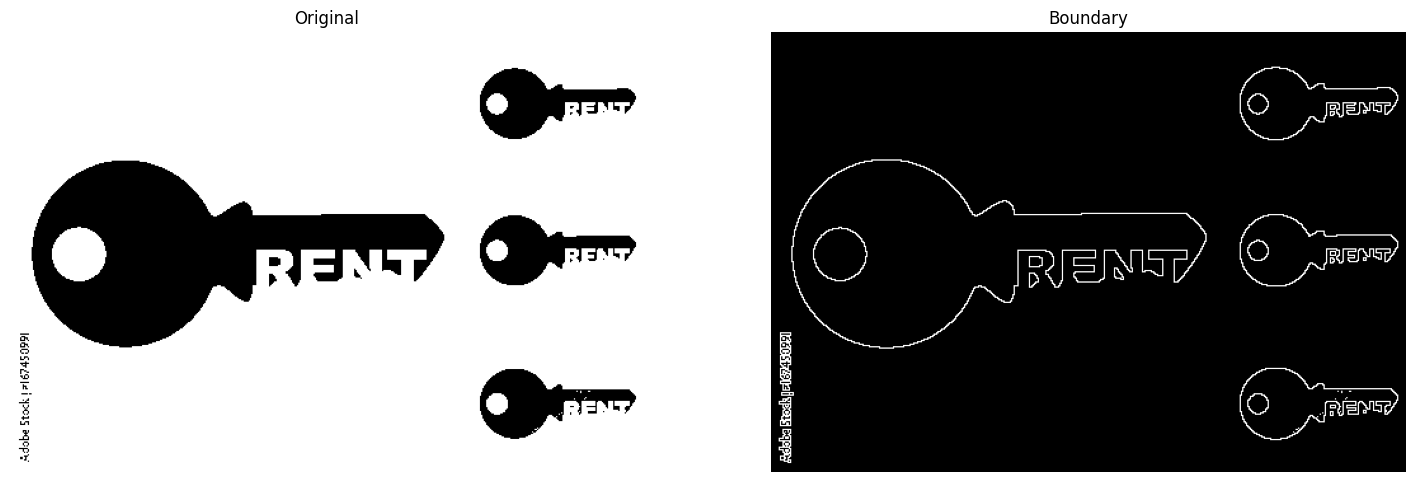

In [45]:
def plot_images_horizontally(original, filtered, filter_name, sz=(18, 7)):
    plt.figure(figsize=sz)
    plt.subplot(1, 2, 1)
    plt.imshow(original, cmap='gray'), plt.title('Original')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(filtered, cmap='gray'), plt.title(filter_name)
    plt.axis('off')
    plt.show()

image_path = 'color_llaves.jpg'
im = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
_, im = cv2.threshold(im, 127, 255, cv2.THRESH_BINARY)  # Binariza la imagen

# Define el elemento estructurante para la erosión
kernel = np.ones((3, 3), np.uint8)

# Aplica la erosión binaria
im_eroded = cv2.erode(im, kernel)

# Calcula el contorno restando la imagen erosionada de la original
boundary = im - im_eroded

# Visualización
plot_images_horizontally(im, boundary, 'Boundary', sz=(18, 9))


* ## **FINGERPRINT CLEANING WITH OPENING AND CLOSING**

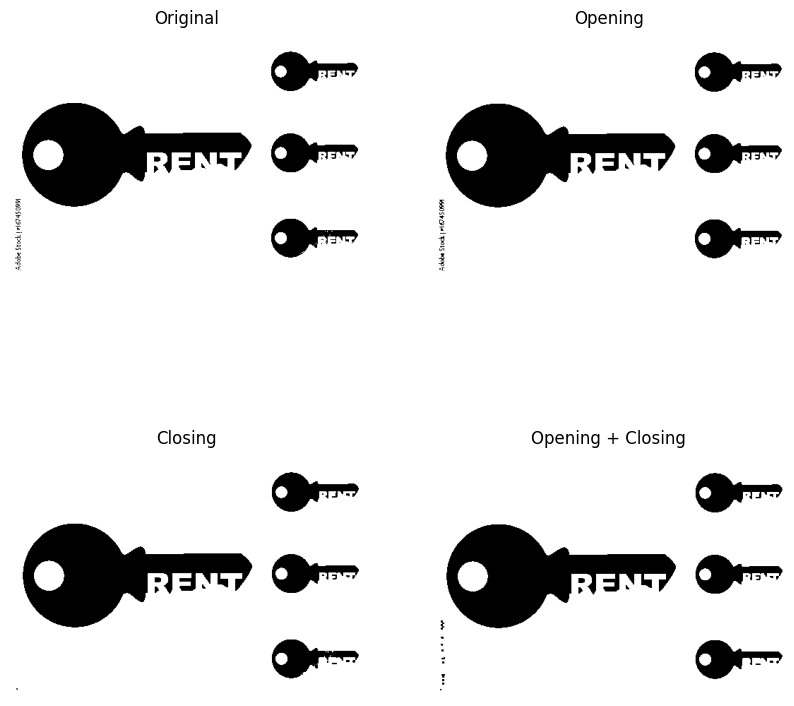

In [ ]:
def plot_image(image, title=''):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')

image_path = 'color_llaves.jpg'
im = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
_, im = cv2.threshold(im, 127, 255, cv2.THRESH_BINARY) 

# Define el elemento estructurante como un cuadrado
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))

# Aplica operaciones morfológicas
im_o = cv2.morphologyEx(im, cv2.MORPH_OPEN, kernel)
im_c = cv2.morphologyEx(im, cv2.MORPH_CLOSE, kernel)
im_oc = cv2.morphologyEx(cv2.morphologyEx(im, cv2.MORPH_OPEN, kernel), cv2.MORPH_CLOSE, kernel)

# Visualización
plt.figure(figsize=(10, 10))
plt.subplot(221)
plot_image(im, 'Original')
plt.subplot(222)
plot_image(im_o, 'Opening')
plt.subplot(223)
plot_image(im_c, 'Closing')
plt.subplot(224)
plot_image(im_oc, 'Opening + Closing')
plt.show()

* ## **GRAYSCALE OPERATIONS**

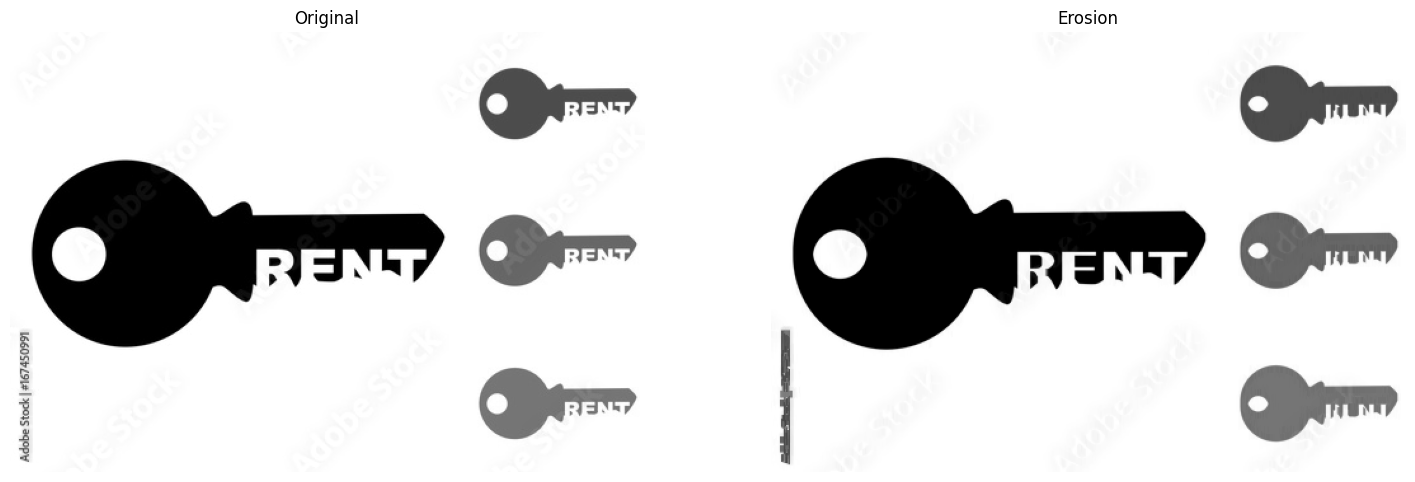

In [47]:
def plot_images_horizontally(original, filtered, filter_name, sz=(18, 7)):
    plt.figure(figsize=sz)
    plt.subplot(1, 2, 1)
    plt.imshow(original, cmap='gray'), plt.title('Original')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(filtered, cmap='gray'), plt.title(filter_name)
    plt.axis('off')
    plt.show()

image_path = 'color_llaves.jpg'
im = cv2.imread(image_path)
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)  # Convierte la imagen a escala de grises

# Define el elemento estructurante como un rectángulo
struct_elem = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 5))

# Realiza la erosión
eroded = cv2.erode(im, struct_elem)

# Visualización
plot_images_horizontally(im, eroded, 'Erosion')

* ## **MORPHOLOGICAL CONTRAST ENHANCEMENT**

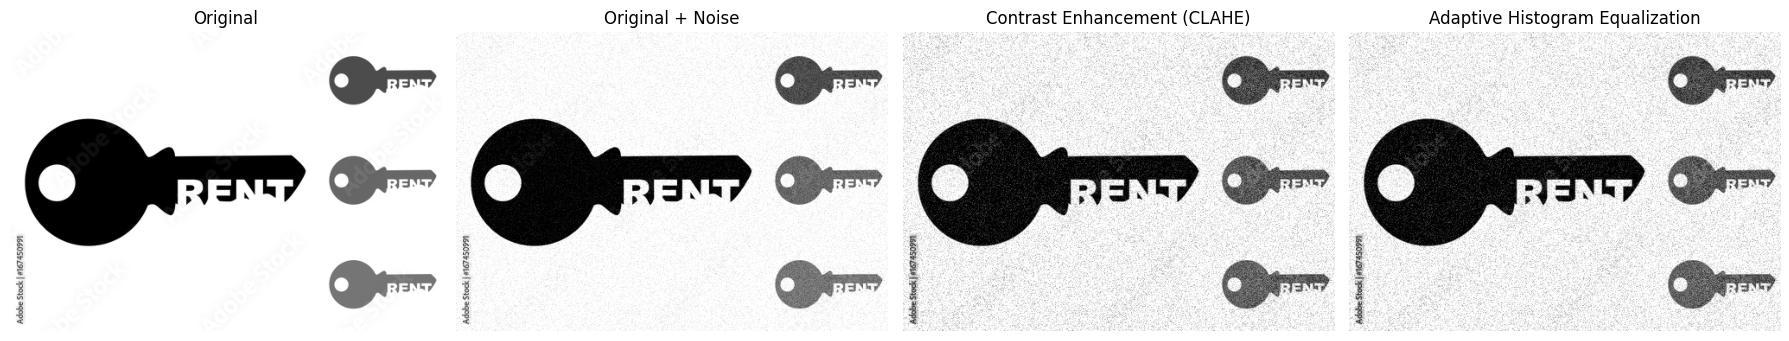

In [48]:
def plot_gray_image(ax, image, title):
    ax.imshow(image, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

# Leer y convertir imagen a escala de grises
image_path = 'color_llaves.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image = image.astype(np.float32) / 255  # Normalizar la imagen

# Añadir ruido a la imagen
sigma = 0.05
noisy_image = np.clip(image + sigma * np.random.standard_normal(image.shape), 0, 1)

# Para la mejora del contraste local, usaremos ecualización de histograma como aproximación
# OpenCV no tiene un equivalente directo a `enhance_contrast` de skimage con un disco
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced_image = clahe.apply((noisy_image * 255).astype(np.uint8)) / 255

# Ecualización de histograma adaptativa
equalized_image = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8)).apply((noisy_image * 255).astype(np.uint8))
equalized_image = equalized_image.astype(np.float32) / 255

# Visualización
fig, axes = plt.subplots(1, 4, figsize=[18, 7], sharex='row', sharey='row')
axes1, axes2, axes3, axes4 = axes.ravel()

plot_gray_image(axes1, image, 'Original')
plot_gray_image(axes2, noisy_image, 'Original + Noise')
plot_gray_image(axes3, enhanced_image, 'Contrast Enhancement (CLAHE)')
plot_gray_image(axes4, equalized_image, 'Adaptive Histogram Equalization')

plt.tight_layout()
plt.show()

* ## **NOISE REMOVAL WITH A MEDIAN FILTER**


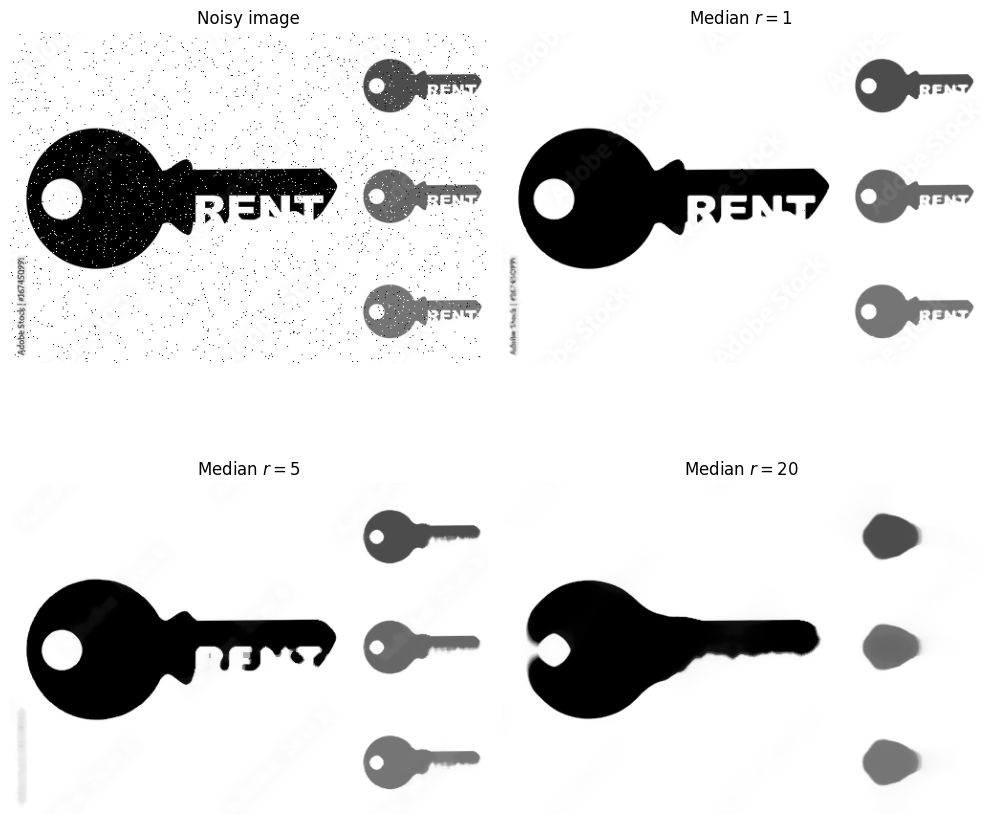

In [49]:
def plot_gray_image(ax, image, title):
    ax.imshow(image, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

image_path = 'color_llaves.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
noisy_image = image.copy()
noise = np.random.random(noisy_image.shape)
noisy_image[noise > 0.98] = 255
noisy_image[noise < 0.01] = 0

fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
axes1, axes2, axes3, axes4 = axes.ravel()

plot_gray_image(axes1, noisy_image, 'Noisy image')
plot_gray_image(axes2, cv2.medianBlur(noisy_image, 3), 'Median $r=1$')  # Kernel size 3x3 equivale a un radio de 1
plot_gray_image(axes3, cv2.medianBlur(noisy_image, 11), 'Median $r=5$')  # Kernel size 11x11 equivale a un radio de 5
plot_gray_image(axes4, cv2.medianBlur(noisy_image, 41), 'Median $r=20$')  # Kernel size 41x41 equivale a un radio de 20

plt.tight_layout()
plt.show()


* ## **COMPUTING THE LOCAL ENTROPY**

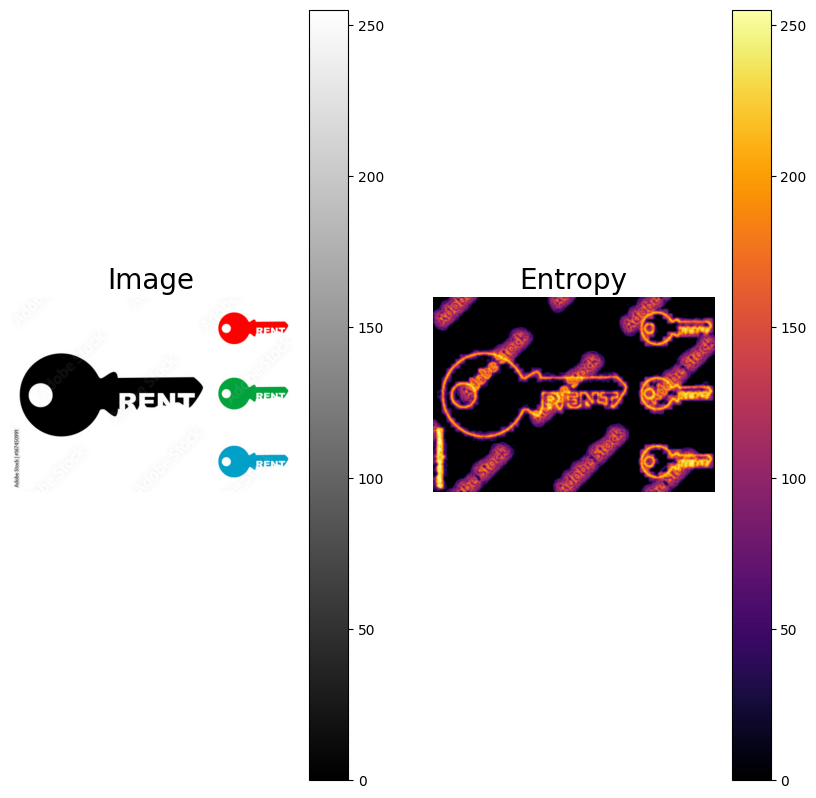

In [50]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

def calculate_entropy(image, kernel_size=5):
    """
    Calcula una aproximación de la entropía de la imagen usando OpenCV.
    """
    # Convertir la imagen a escala de grises si es necesario
    if len(image.shape) > 2:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calcular la entropía local en bloques
    pad_size = kernel_size // 2
    padded_image = cv2.copyMakeBorder(image, pad_size, pad_size, pad_size, pad_size, cv2.BORDER_REFLECT)
    entropy_image = np.zeros_like(image, dtype=float)

    for row in range(image.shape[0]):
        for col in range(image.shape[1]):
            # Extraer el bloque centrado en (row, col)
            block = padded_image[row:row+kernel_size, col:col+kernel_size]
            # Calcular el histograma normalizado del bloque
            hist, _ = np.histogram(block, bins=256, range=(0, 256), density=True)
            hist += 1e-100  # Evitar el logaritmo de cero
            # Calcular la entropía del bloque
            entropy = -np.sum(hist * np.log2(hist))
            entropy_image[row, col] = entropy

    # Normalizar la imagen de entropía para visualización
    entropy_image = cv2.normalize(entropy_image, None, 0, 255, cv2.NORM_MINMAX)
    return entropy_image.astype(np.uint8)

image_path = 'color_llaves.jpg'
image = cv2.imread(image_path)

# Calcular la entropía
entropy_image = calculate_entropy(image, kernel_size=5)

# Visualización
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10), sharex=True, sharey=True)

cax1 = ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), cmap='gray')
ax1.axis('off')
ax1.set_title('Image', size=20)
fig.colorbar(cax1, ax=ax1)

cax2 = ax2.imshow(entropy_image, cmap='inferno')
ax2.axis('off')
ax2.set_title('Entropy', size=20)
fig.colorbar(cax2, ax=ax2)

plt.show()

* ## **FILLING HOLES IN BINARY OBJECTS**

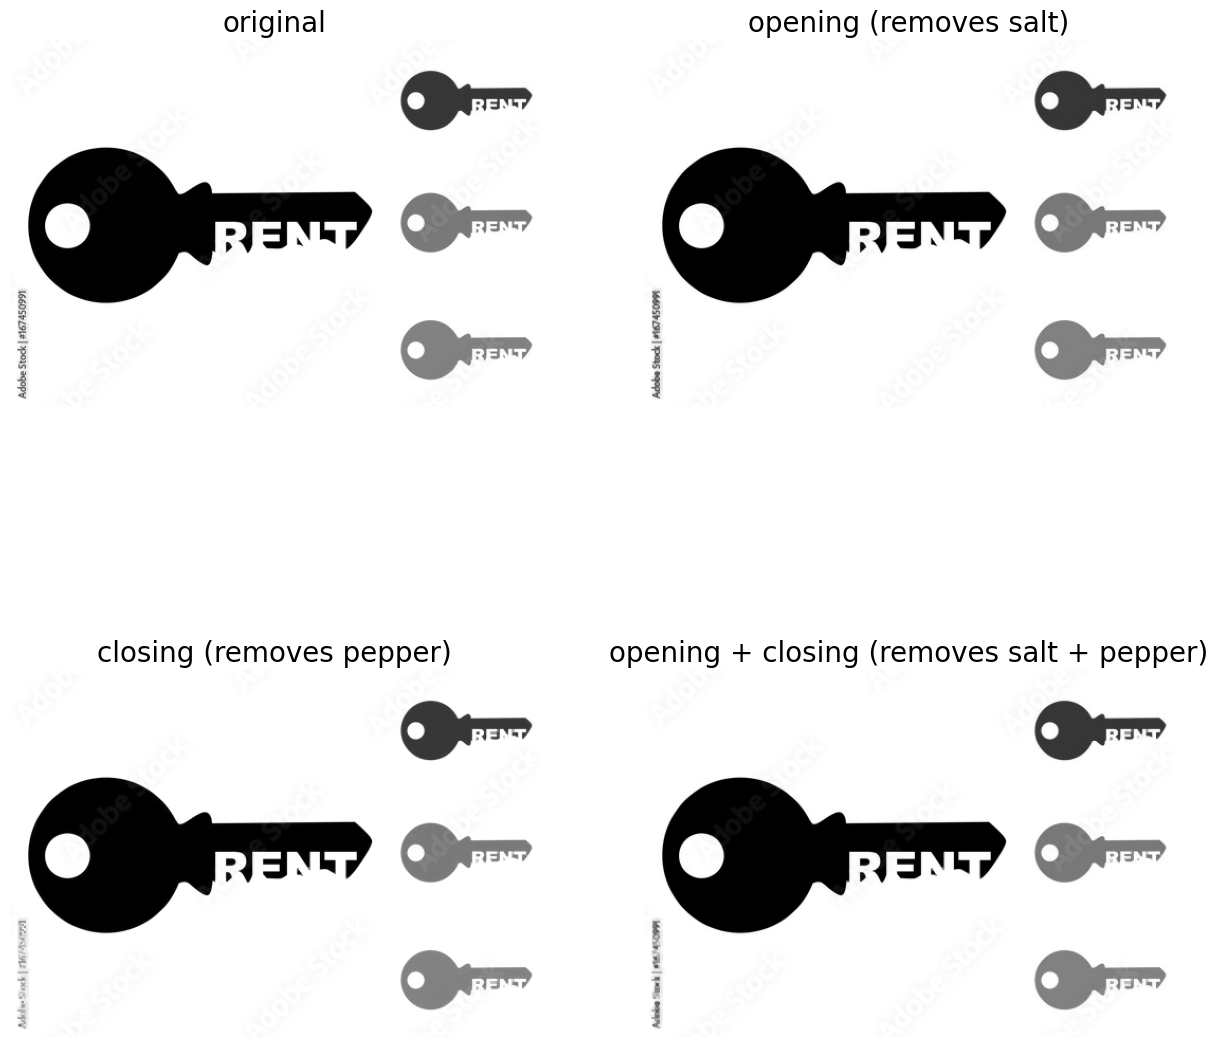

In [53]:
from scipy import ndimage
from skimage.color import rgb2gray
from skimage.io import imread

image_path = 'color_llaves.jpg'
im = rgb2gray(imread(image_path))
im_o = ndimage.grey_opening(im, size=(2,2))
im_c = ndimage.grey_closing(im, size=(2,2))
im_oc = ndimage.grey_closing(ndimage.grey_opening(im, size=(2,2)), size=(2,2))
plt.figure(figsize=(15,15))
plt.subplot(221), plt.imshow(im, cmap='gray'), plt.title('original', size=20), plt.axis('off')
plt.subplot(222), plt.imshow(im_o, cmap='gray'), plt.title('opening (removes salt)', size=20), plt.axis('off')
plt.subplot(223), plt.imshow(im_c, cmap='gray'), plt.title('closing (removes pepper)', size=20),plt.axis('off')
plt.subplot(224), plt.imshow(im_oc, cmap='gray'), plt.title('opening + closing (removes salt + pepper)', size=20)
plt.axis('off')
plt.show()

* ## **COMPUTING THE MORHOLOGICAL BEUCHER GRADIENT**

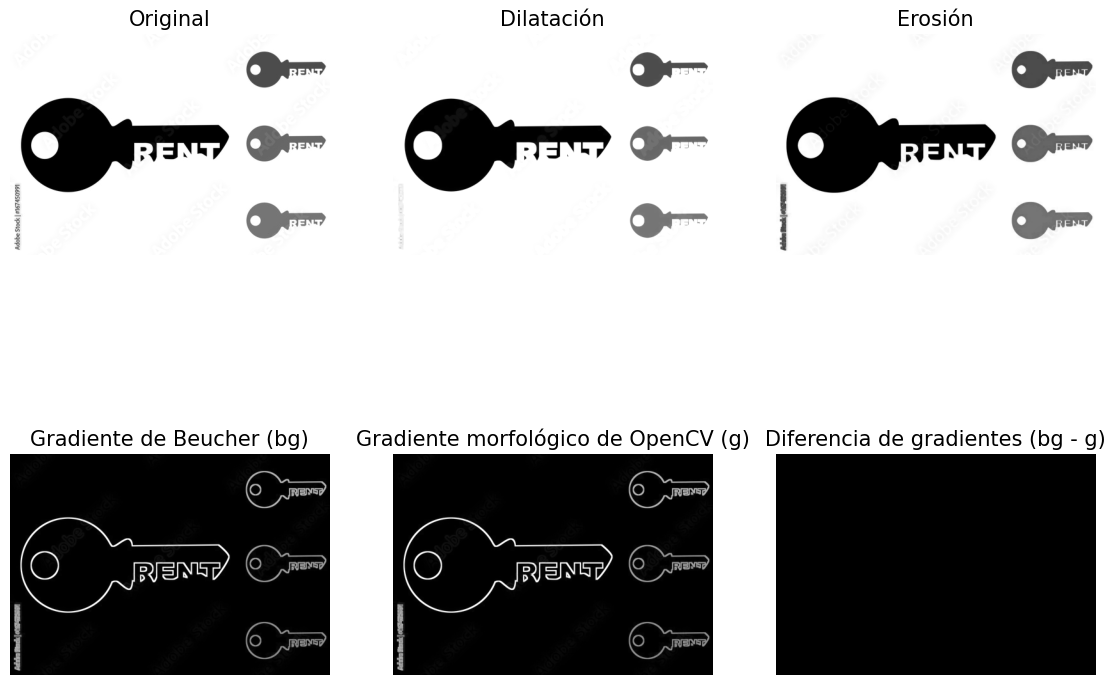

In [55]:
# Cargar la imagen
image_path = 'color_llaves.jpg'
im = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Aplicar dilatación y erosión
kernel = np.ones((3, 3), np.uint8)
im_d = cv2.dilate(im, kernel)
im_e = cv2.erode(im, kernel)

# Calcular el gradiente de Beucher (diferencia entre dilatación y erosión)
im_bg = im_d - im_e

# Calcular el gradiente morfológico usando OpenCV
im_g = cv2.morphologyEx(im, cv2.MORPH_GRADIENT, kernel)

# Visualización
plt.figure(figsize=(14, 10))
plt.subplot(231), plt.imshow(im, cmap='gray'), plt.title('Original', size=15), plt.axis('off')
plt.subplot(232), plt.imshow(im_d, cmap='gray'), plt.title('Dilatación', size=15), plt.axis('off')
plt.subplot(233), plt.imshow(im_e, cmap='gray'), plt.title('Erosión', size=15), plt.axis('off')
plt.subplot(234), plt.imshow(im_bg, cmap='gray'), plt.title('Gradiente de Beucher (bg)', size=15), plt.axis('off')
plt.subplot(235), plt.imshow(im_g, cmap='gray'), plt.title('Gradiente morfológico de OpenCV (g)', size=15), plt.axis('off')
plt.subplot(236), plt.imshow(im_bg - im_g, cmap='gray'), plt.title('Diferencia de gradientes (bg - g)', size=15), plt.axis('off')
plt.show()


* ## **COMPUTING THE MORPHOLOGICAL LAPLACE**

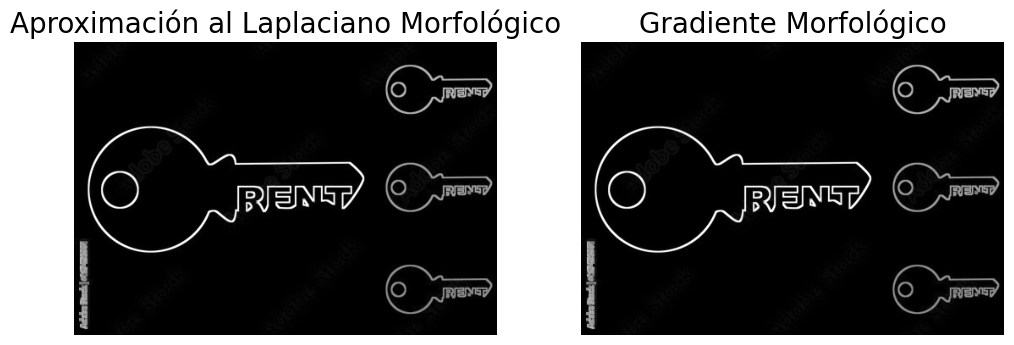

In [57]:
image_path = 'color_llaves.jpg'
im = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)

# Verificar si la imagen tiene un canal alfa
if im.shape[2] == 4:
    im = im[..., 3]  # Usar el canal alfa
else:
    im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)  # Convertir a escala de grises si no tiene canal alfa

# Gradiente morfológico usando OpenCV
kernel = np.ones((3, 3), np.uint8)
im_g = cv2.morphologyEx(im, cv2.MORPH_GRADIENT, kernel)

# Aproximación del Laplaciano morfológico usando dilatación y erosión
im_d = cv2.dilate(im, kernel)
im_e = cv2.erode(im, kernel)
im_l = im_d - im_e  # Esta es una aproximación simplificada

# Visualización
plt.figure(figsize=(12, 8))
plt.subplot(121)
plt.imshow(im_l, cmap='gray')
plt.title('Aproximación al Laplaciano Morfológico', size=20)
plt.axis('off')

plt.subplot(122)
plt.imshow(im_g, cmap='gray')
plt.title('Gradiente Morfológico', size=20)
plt.axis('off')

plt.show()

* # **Ejercicio 5**
Crea una clase que reciba una imagen binaria y que cuente con métodos para realizar las operaciones morfológicas que se han visto en clase.

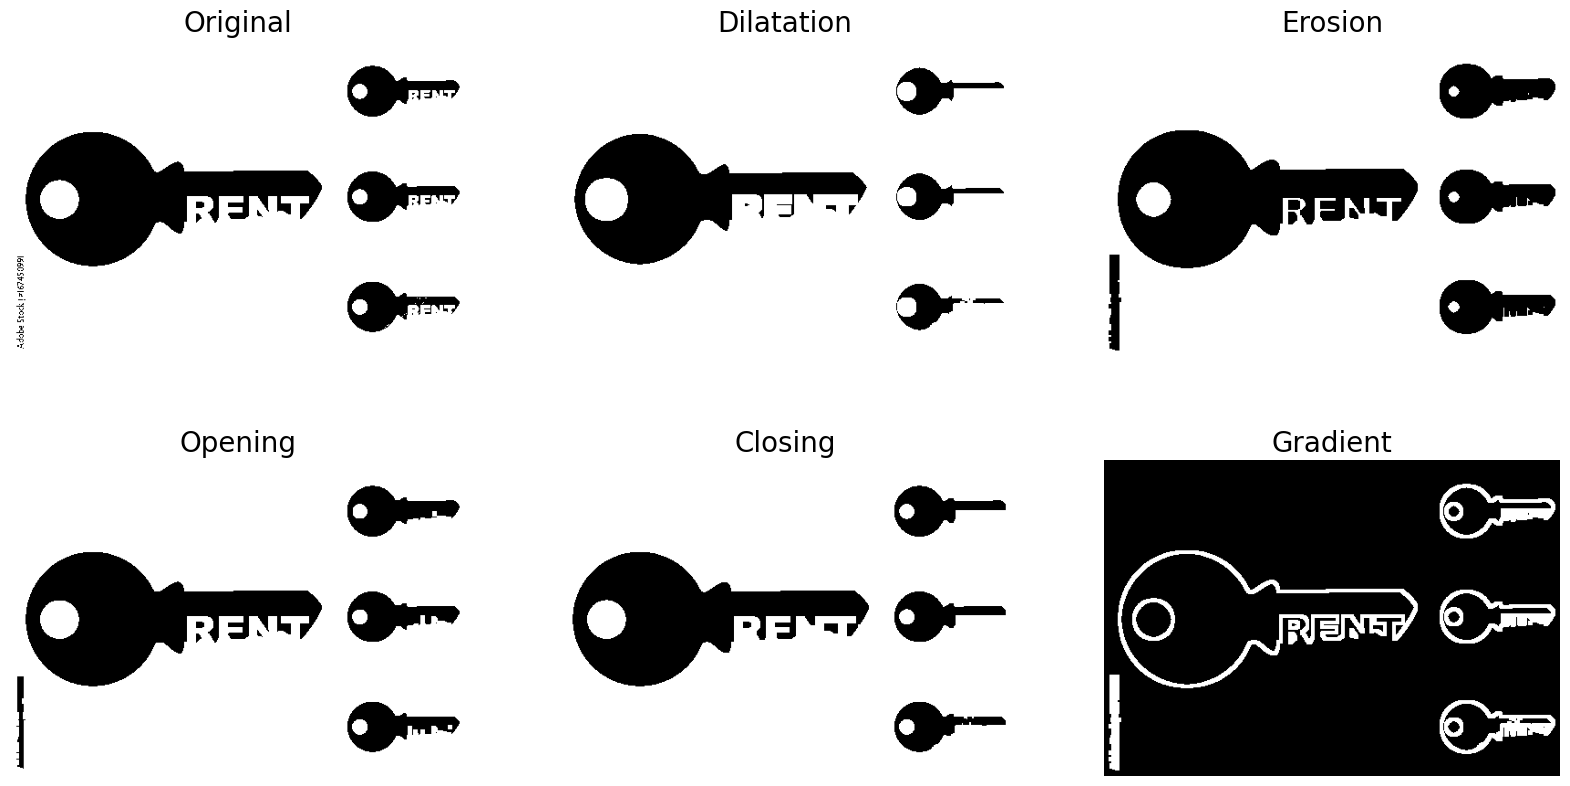

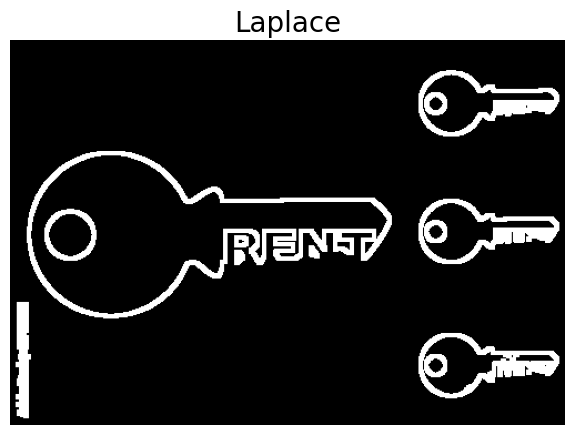

In [59]:


class MorphologicalOperations:
    """
    Clase para realizar operaciones morfológicas en una imagen binaria.

    Métodos:
    - dilation: Realiza la dilatación de la imagen.
    - erosion: Realiza la erosión de la imagen.
    - opening: Realiza la apertura de la imagen.
    - closing: Realiza el cierre de la imagen.
    - morphological_gradient: Realiza el gradiente morfológico de la imagen.
    - morphological_laplace: Realiza el laplaciano morfológico de la imagen.
    """

    def __init__(self, image):
        """
        Inicializa la clase MorphologicalOperations.

        Parámetros:
        - image (numpy.ndarray): Imagen binaria.
        """
        self.image = image

    def dilation(self, kernel_size=(3, 3)):
        """
        Realiza la dilatación de la imagen.

        Parámetros:
        - kernel_size (tuple): Tamaño del elemento estructurante.

        Retorna:
        - dilated_image (numpy.ndarray): Imagen dilatada.
        """
        kernel = np.ones(kernel_size, np.uint8)
        return cv2.dilate(self.image, kernel)

    def erosion(self, kernel_size=(3, 3)):
        """
        Realiza la erosión de la imagen.

        Parámetros:
        - kernel_size (tuple): Tamaño del elemento estructurante.

        Retorna:
        - eroded_image (numpy.ndarray): Imagen erosionada.
        """
        kernel = np.ones(kernel_size, np.uint8)
        return cv2.erode(self.image, kernel)

    def opening(self, kernel_size=(3, 3)):
        """
        Realiza la apertura de la imagen.

        Parámetros:
        - kernel_size (tuple): Tamaño del elemento estructurante.

        Retorna:
        - opened_image (numpy.ndarray): Imagen con apertura.
        """
        kernel = np.ones(kernel_size, np.uint8)
        return cv2.morphologyEx(self.image, cv2.MORPH_OPEN, kernel)

    def closing(self, kernel_size=(3, 3)):
        """
        Realiza el cierre de la imagen.

        Parámetros:
        - kernel_size (tuple): Tamaño del elemento estructurante.

        Retorna:
        - closed_image (numpy.ndarray): Imagen con cierre.
        """
        kernel = np.ones(kernel_size, np.uint8)
        return cv2.morphologyEx(self.image, cv2.MORPH_CLOSE, kernel)

    def morphological_gradient(self, kernel_size=(3, 3)):
        """
        Realiza el gradiente morfológico de la imagen.

        Parámetros:
        - kernel_size (tuple): Tamaño del elemento estructurante.

        Retorna:
        - gradient_image (numpy.ndarray): Imagen con gradiente morfológico.
        """
        kernel = np.ones(kernel_size, np.uint8)
        return cv2.morphologyEx(self.image, cv2.MORPH_GRADIENT, kernel)

    def morphological_laplace(self, kernel_size=(3, 3)):
        """
        Realiza el laplaciano morfológico de la imagen.

        Parámetros:
        - kernel_size (tuple): Tamaño del elemento estructurante.

        Retorna:
        - laplace_image (numpy.ndarray): Imagen con laplaciano morfológico.
        """
        kernel = np.ones(kernel_size, np.uint8)
        dilated = cv2.dilate(self.image, kernel)
        eroded = cv2.erode(self.image, kernel)
        return dilated - eroded

# Ejemplo de uso
def plot_image(image, title=''):
    """
    Muestra una imagen con un título dado.

    Parámetros:
    - image (numpy.ndarray): Imagen a mostrar.
    - title (str): Título de la imagen.
    """
    plt.title(title, size=20)
    plt.imshow(image, cmap='gray')
    plt.axis('off')

def main():
    """
    Función principal que realiza las operaciones morfológicas en una imagen binaria.
    """
    image_path = 'color_llaves.jpg'
    
    # Lee la imagen y la convierte a escala de grises
    im = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Binariza la imagen
    _, binary_image = cv2.threshold(im, 127, 255, cv2.THRESH_BINARY)
    
    # Crea una instancia de la clase MorphologicalOperations
    morph_ops = MorphologicalOperations(binary_image)
    
    # Realiza las operaciones morfológicas
    dilated_image = morph_ops.dilation(kernel_size=(5, 5))
    eroded_image = morph_ops.erosion(kernel_size=(5, 5))
    opened_image = morph_ops.opening(kernel_size=(5, 5))
    closed_image = morph_ops.closing(kernel_size=(5, 5))
    gradient_image = morph_ops.morphological_gradient(kernel_size=(5, 5))
    laplace_image = morph_ops.morphological_laplace(kernel_size=(5, 5))
    
    # Muestra las imágenes resultantes
    plt.figure(figsize=(20, 10))
    plt.subplot(2, 3, 1)
    plot_image(binary_image, 'Original')
    plt.subplot(2, 3, 2)
    plot_image(dilated_image, 'Dilatation')
    plt.subplot(2, 3, 3)
    plot_image(eroded_image, 'Erosion')
    plt.subplot(2, 3, 4)
    plot_image(opened_image, 'Opening')
    plt.subplot(2, 3, 5)
    plot_image(closed_image, 'Closing')
    plt.subplot(2, 3, 6)
    plot_image(gradient_image, 'Gradient')
    plt.figure(figsize=(10, 5))
    plot_image(laplace_image, 'Laplace')
    plt.show()

if __name__ == "__main__":
    main()